## Import All Necessary Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
from torchvision import transforms
from PIL import Image
import random
from sklearn.utils import resample


## Label Set Analysis

Index(['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration'], dtype='object')
Boredom Map: {'0': 3822, '1': 2850, '2': 1923, '3': 330}
Engagement Map: {'0': 61, '1': 455, '2': 4422, '3': 3987}
Confusion Map: {'0': 5951, '1': 2133, '2': 741, '3': 100}
Frustration Map: {'0': 6887, '1': 1613, '2': 338, '3': 87}


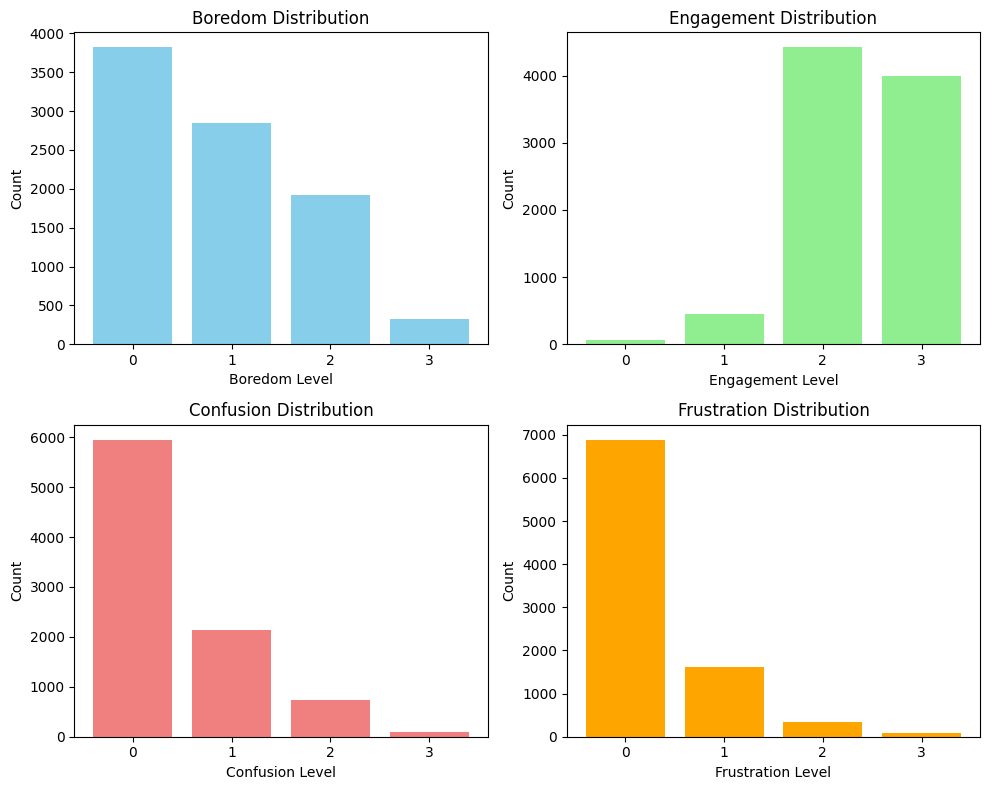

Index(['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration'], dtype='object')
Boredom Test Map: {'0': 823, '1': 584, '2': 338, '3': 39}
Engagement Test Map: {'0': 4, '1': 84, '2': 882, '3': 814}
Confusion Test Map: {'0': 1200, '1': 427, '2': 136, '3': 21}
Frustration Test Map: {'0': 1388, '1': 316, '2': 57, '3': 23}


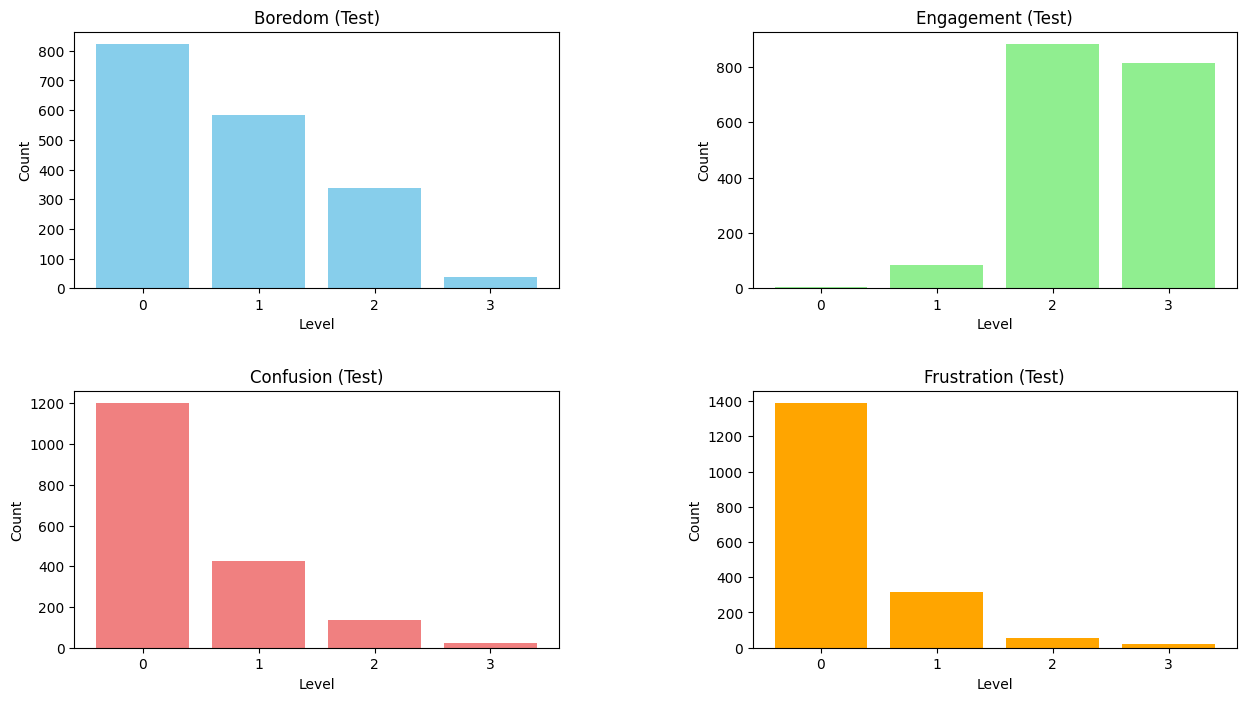

In [93]:
df = pd.read_csv('C:/Users/ahmad/Desktop/EngagementML/DAiSEE/Labels/AllLabels.csv')

# Initialize maps for counting labels
boredom_map = {'0': 0, '1': 0, '2': 0, '3': 0}
engagement_map = {'0': 0, '1': 0, '2': 0, '3': 0}
confusion_map = {'0': 0, '1': 0, '2': 0, '3': 0}
frustration_map = {'0': 0, '1': 0, '2': 0, '3': 0}

print(df.columns)

# Iterate through all the rows in Dataframe
for row in df.itertuples(index=False):
    boredom_map[str(row.Boredom)] += 1
    engagement_map[str(row.Engagement)] += 1
    confusion_map[str(row.Confusion)] += 1
    frustration_map[str(row.Frustration)] += 1

# Display the counts
print("Boredom Map:", boredom_map)
print("Engagement Map:", engagement_map)
print("Confusion Map:", confusion_map)
print("Frustration Map:", frustration_map)


# Plotting the graphs
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Boredom Plot
axs[0, 0].bar(boredom_map.keys(), boredom_map.values(), color='skyblue')
axs[0, 0].set_title('Boredom Distribution')
axs[0, 0].set_xlabel('Boredom Level')
axs[0, 0].set_ylabel('Count')

# Engagement Plot
axs[0, 1].bar(engagement_map.keys(), engagement_map.values(), color='lightgreen')
axs[0, 1].set_title('Engagement Distribution')
axs[0, 1].set_xlabel('Engagement Level')
axs[0, 1].set_ylabel('Count')

# Confusion Plot
axs[1, 0].bar(confusion_map.keys(), confusion_map.values(), color='lightcoral')
axs[1, 0].set_title('Confusion Distribution')
axs[1, 0].set_xlabel('Confusion Level')
axs[1, 0].set_ylabel('Count')

# Frustration Plot
axs[1, 1].bar(frustration_map.keys(), frustration_map.values(), color='orange')
axs[1, 1].set_title('Frustration Distribution')
axs[1, 1].set_xlabel('Frustration Level')
axs[1, 1].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



test_df = pd.read_csv('C:/Users/ahmad/Desktop/EngagementML/DAiSEE/Labels/TestLabels.csv')

# Initialize maps for counting labels
boredom_test_map = {'0': 0, '1': 0, '2': 0, '3': 0}
engagement_test_map = {'0': 0, '1': 0, '2': 0, '3': 0}
confusion_test_map = {'0': 0, '1': 0, '2': 0, '3': 0}
frustration_test_map = {'0': 0, '1': 0, '2': 0, '3': 0}

print(test_df.columns)

# Iterate through all the rows in Dataframe
for row in test_df.itertuples(index=False):
    boredom_test_map[str(row.Boredom)] += 1
    engagement_test_map[str(row.Engagement)] += 1
    confusion_test_map[str(row.Confusion)] += 1
    frustration_test_map[str(row.Frustration)] += 1

# Display the counts
print("Boredom Test Map:", boredom_test_map)
print("Engagement Test Map:", engagement_test_map)
print("Confusion Test Map:", confusion_test_map)
print("Frustration Test Map:", frustration_test_map)

fig1, axs1 = plt.subplots(2, 2, figsize=(15, 8))


# Test set plots
axs1[0, 0].bar(boredom_test_map.keys(), boredom_test_map.values(), color='skyblue')
axs1[0, 0].set_title('Boredom (Test)')
axs1[0, 0].set_xlabel('Level')
axs1[0, 0].set_ylabel('Count')

axs1[0, 1].bar(engagement_test_map.keys(), engagement_test_map.values(), color='lightgreen')
axs1[0, 1].set_title('Engagement (Test)')
axs1[0, 1].set_xlabel('Level')
axs1[0, 1].set_ylabel('Count')

axs1[1, 0].bar(confusion_test_map.keys(), confusion_test_map.values(), color='lightcoral')
axs1[1, 0].set_title('Confusion (Test)')
axs1[1, 0].set_xlabel('Level')
axs1[1, 0].set_ylabel('Count')

axs1[1, 1].bar(frustration_test_map.keys(), frustration_test_map.values(), color='orange')
axs1[1, 1].set_title('Frustration (Test)')
axs1[1, 1].set_xlabel('Level')
axs1[1, 1].set_ylabel('Count')

# Add padding between subplots
fig1.subplots_adjust(hspace=0.4, wspace=0.4)



## Extracting Faces from Images 

Original Image Pixel Count: 307200 (Width: 640, Height: 480)
Cropped Face 0 - Pixel Count: 25740
Face 0: Resized Pixel Count = 6400 (Width: 80, Height: 80)


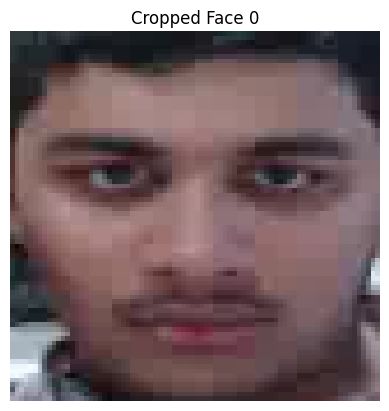

Original Image Pixel Count: 307200 (Width: 640, Height: 480)
Cropped Face 0 - Pixel Count: 11400
Face 0: Resized Pixel Count = 6400 (Width: 80, Height: 80)


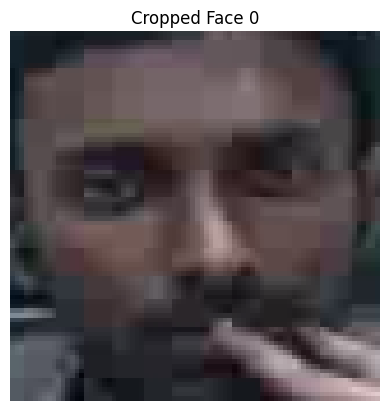

Original Image Pixel Count: 307200 (Width: 640, Height: 480)
Cropped Face 0 - Pixel Count: 25988
Face 0: Resized Pixel Count = 6400 (Width: 80, Height: 80)


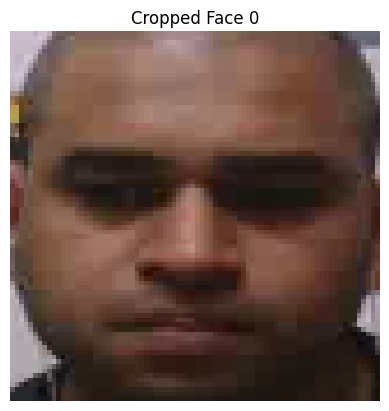

In [3]:
# Load OpenCV DNN
model_path = "C:/Users/ahmad/Desktop/EngagementML/opencv-dnn/res10_300x300_ssd_iter_140000.caffemodel"
config_path = "C:/Users/ahmad/Desktop/EngagementML/opencv-dnn/deploy.prototxt"

# Load the pre-trained DNN model
face_net = cv2.dnn.readNetFromCaffe(config_path, model_path)

# Specify the file you want to test
test_file = "C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet/Train/110006/1100062024/110006202461.jpg"  # Update with the actual file path
output_folder_resized = "C:/Users/ahmad/Desktop/EngagementML/resized_faces"


def resize_face(image_path, output_dir_resized,  target_size=(80, 80)):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image {image_path}")
        return

    # Prepare the image for the DNN
    blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size=(300, 300),
                                 mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
    face_net.setInput(blob)
    detections = face_net.forward()

    (h, w) = image.shape[:2]
    original_pixel_count = h * w
    print(f"Original Image Pixel Count: {original_pixel_count} (Width: {image.shape[1]}, Height: {image.shape[0]})")

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:  # Confidence threshold
            # Get the bounding box
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x, y, x1, y1) = box.astype("int")

            # Ensure the bounding box is within the image dimensions
            x, y, x1, y1 = max(0, x), max(0, y), min(w, x1), min(h, y1)

            # Crop the face
            cropped_face = image[y:y1, x:x1]
            cropped_pixel_count = (x1 - x) * (y1 - y)
            print(f"Cropped Face {i} - Pixel Count: {cropped_pixel_count}")

            # Resize the cropped face to the target size
            resized_face = cv2.resize(cropped_face, target_size)
            resized_pixel_count = target_size[0] * target_size[1]
            print(f"Face {i}: Resized Pixel Count = {resized_pixel_count} (Width: {target_size[0]}, Height: {target_size[1]})")

            plt.imshow(cv2.cvtColor(resized_face, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
            plt.title(f"Cropped Face {i}")
            plt.axis('off')
            plt.show()

            # Ensure output directories exist
            os.makedirs(output_dir_resized, exist_ok=True)

            # Save cropped face
            resized_filename = os.path.join(output_dir_resized, f"{os.path.basename(image_path)}_face{i}.jpg")
            cv2.imwrite(resized_filename, resized_face)

    if detections.shape[2] == 0:
        print(f"No faces detected in {image_path}")

test_file1 = 'C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet/Train/110005/1100051067/110005106739.jpg'  # Updated file path
test_file2 = 'C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet/Test/510042/5100422080/510042208010.jpg'  # Updated file path


resize_face(test_file, output_folder_resized)
resize_face(test_file1, output_folder_resized)
resize_face(test_file2, output_folder_resized)

## Convert Image to Grayscale

Saved grayscale image to C:/Users/ahmad/Desktop/EngagementML\gray_51004210183.jpg_face0.jpg


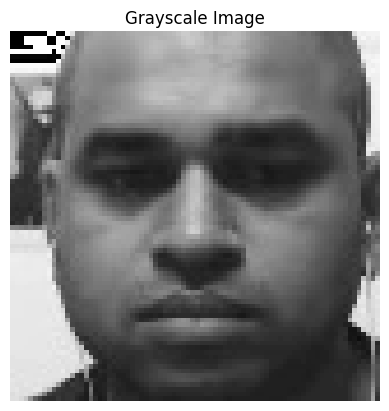

tensor([[[-0.0013, -0.0013, -0.0013,  ..., -0.0484, -0.0536, -0.0536],
         [-0.0013, -0.0013, -0.0013,  ..., -0.0850, -0.0536, -0.0745],
         [-0.0013, -0.0013, -0.0013,  ..., -0.0745, -0.0797, -0.0850],
         ...,
         [-0.1111, -0.1059, -0.1320,  ..., -0.6758, -0.4405, -0.7333],
         [-0.1425, -0.1216, -0.1320,  ..., -0.6706, -0.3987, -0.7804],
         [-0.1320, -0.1268, -0.1582,  ..., -0.6706, -0.3725, -0.8118]]])

In [24]:
output_folder_resized_grayscale = "C:/Users/ahmad/Desktop/EngagementML"


# Define a PyTorch transform for grayscale conversion
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to 1-channel grayscale
    transforms.ToTensor(),                         # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.75], std=[0.75])   # Normalize: shift and scale pixel values
])

def apply_gray_transform(image_path):
    # Load the image using PIL
    image = Image.open(image_path).convert('RGB')  # Ensure RGB format

    # Apply the grayscale transformation
    grayscale_tensor = transform(image)

    # Convert the PyTorch tensor back to a PIL image
    grayscale_image = transforms.ToPILImage()(grayscale_tensor)

    # Ensure the output folder exists
    os.makedirs(output_folder_resized_grayscale, exist_ok=True)

    # Save the grayscale image
    output_file = os.path.join(output_folder_resized_grayscale, f"gray_{os.path.basename(image_path)}")
    grayscale_image.save(output_file)
    print(f"Saved grayscale image to {output_file}")

    plt.imshow(grayscale_image, cmap='gray')  # Grayscale images use cmap='gray'
    plt.axis('off')  # Turn off axis labels
    plt.title("Grayscale Image")
    plt.show()

    return grayscale_tensor


apply_gray_transform(r'C:\Users\ahmad\Desktop\EngagementML\resized_faces\51004210183.jpg_face0.jpg')


## Process Multiple Images 

We will now resize 1 random frame from 1 random video of every single person and apply the grayscale transform on the frame within the dataset to ensure that our resized frames remain consistent.

In [148]:
# Load DNN model
model_path = "C:/Users/ahmad/Desktop/EngagementML/opencv-dnn/res10_300x300_ssd_iter_140000.caffemodel"
config_path = "C:/Users/ahmad/Desktop/EngagementML/opencv-dnn/deploy.prototxt"
face_net = cv2.dnn.readNetFromCaffe(config_path, model_path)

# Directories
faces_dir = "C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet"
output_folder_resized_grayscale = "C:/Users/ahmad/Desktop/EngagementML/resized_gray_faces"

def process_random_frame(dataset_dir, target_size=(80, 80)):
    # Ensure output directory exists
    os.makedirs(output_folder_resized_grayscale, exist_ok=True)

    # Iterate over dataset types (Training, Testing, Validation)
    for dataset_type in ["Test", "Train", "Validation"]:
        dataset_path = os.path.join(dataset_dir, dataset_type)

        if not os.path.isdir(dataset_path):
            print(f"Dataset type {dataset_type} not found at {dataset_path}")
            continue

        # Iterate over each person
        for person_dir in os.listdir(dataset_path):
            person_path = os.path.join(dataset_path, person_dir)

            if os.path.isdir(person_path):
                # Get all video files for this person
                video_files = [os.path.join(person_path, video_dir, f)
                               for video_dir in os.listdir(person_path)
                               if os.path.isdir(os.path.join(person_path, video_dir))
                               for f in os.listdir(os.path.join(person_path, video_dir))
                               if f.lower().endswith(('.avi', '.mp4'))]

                if not video_files:
                    print(f"No video files found for person: {person_dir}")
                    continue

                # Select a random video file
                selected_video = random.choice(video_files)
                print(f"Processing video: {selected_video}")

                # Capture frames from the video
                cap = cv2.VideoCapture(selected_video)
                frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

                if frame_count == 0:
                    print(f"No frames found in video: {selected_video}")
                    cap.release()
                    continue

                # Select a random frame
                random_frame_idx = random.randint(0, frame_count - 1)
                cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_idx)

                ret, frame = cap.read()
                cap.release()

                if not ret:
                    print(f"Failed to read frame {random_frame_idx} from video: {selected_video}")
                    continue

                # Convert to grayscale for face detection
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                # Prepare the frame for DNN
                (h, w) = frame.shape[:2]
                blob = cv2.dnn.blobFromImage(frame, scalefactor=1.0, size=(300, 300),
                                             mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
                face_net.setInput(blob)
                detections = face_net.forward()

                if detections.shape[2] == 0:
                    print(f"No faces detected in frame {random_frame_idx} of video: {selected_video}")
                    continue

                # Process the first detected face
                confidence = detections[0, 0, 0, 2]
                if confidence > 0.5:  # Confidence threshold
                    box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
                    (x, y, x1, y1) = box.astype("int")

                    # Ensure the bounding box is within the image dimensions
                    x, y, x1, y1 = max(0, x), max(0, y), min(w, x1), min(h, y1)

                    # Crop the face
                    cropped_face = frame[y:y1, x:x1]

                    # Resize the cropped face to the target size
                    resized_face = cv2.resize(cropped_face, target_size)

                    # Convert the resized face (NumPy array) to a PIL image
                    resized_face_pil = Image.fromarray(cv2.cvtColor(resized_face, cv2.COLOR_BGR2RGB))

                    # Apply the grayscale transformation
                    grayscale_tensor = transform(resized_face_pil)
                    transformed_image = transforms.ToPILImage()(grayscale_tensor)  # Convert back to PIL image

                    # Save the transformed image
                    output_filename = f"{dataset_type}_{person_dir}_{os.path.basename(selected_video).split('.')[0]}_frame{random_frame_idx}.jpg"
                    output_file = os.path.join(output_folder_resized_grayscale, output_filename)

                    transformed_image.save(output_file)
                    print(f"Processed and saved: {output_file}")

# Run the function
process_random_frame(faces_dir, target_size=(80, 80))


Processing video: C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet\Test\500044\5000442054\5000442054.avi
Processed and saved: C:/Users/ahmad/Desktop/EngagementML/resized_gray_faces\Test_500044_5000442054_frame294.jpg
Processing video: C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet\Test\500067\5000671022\5000671022.avi
Processed and saved: C:/Users/ahmad/Desktop/EngagementML/resized_gray_faces\Test_500067_5000671022_frame281.jpg
Processing video: C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet\Test\500095\5000951019\5000951019.avi
Processed and saved: C:/Users/ahmad/Desktop/EngagementML/resized_gray_faces\Test_500095_5000951019_frame138.jpg
Processing video: C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet\Test\510009\5100092032\5100092032.avi
Processed and saved: C:/Users/ahmad/Desktop/EngagementML/resized_gray_faces\Test_510009_5100092032_frame173.jpg
Processing video: C:/Users/ahmad/Desktop/EngagementML/DAiSEE/DataSet\Test\510034\5100341020\5100341020.avi
Processed and sav

Ran script 20 times and found 0 errors. 
- All faces are recognized properly (contains no false positives), all faces are in the center of the frame.
- Grayscale transformation has been applied to all images.
- Resized dimensions are consistent.

## Preprocess Images